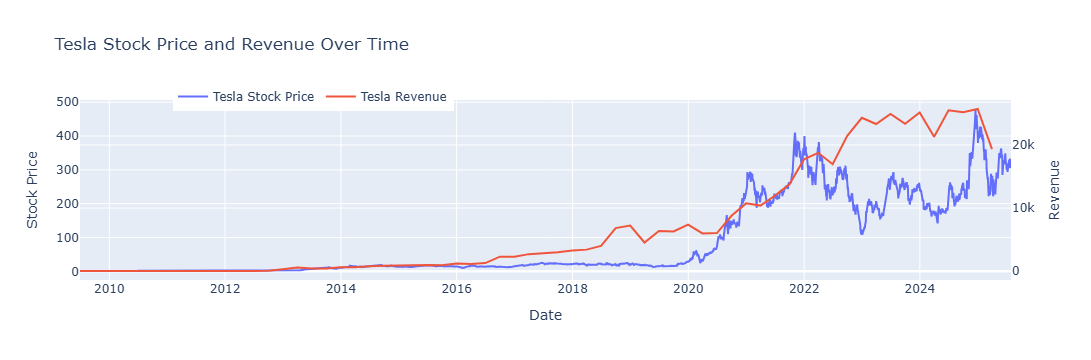

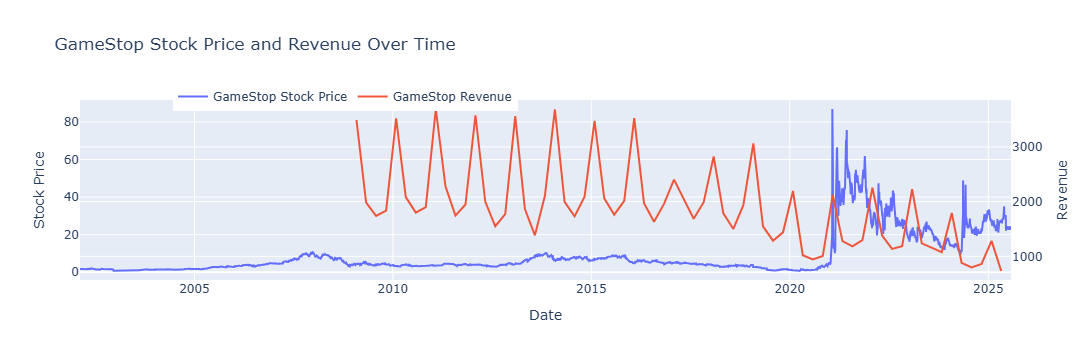

In [13]:
# Import libraries
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import plotly.graph_objs as go
# Download Tesla stock data
tesla = yf.Ticker("TSLA")
tesla_data = tesla.history(period="max")

import pandas as pd
import requests
from io import StringIO  # This is the fix

# Tesla revenue page
url = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"

# Get the HTML with a user-agent
html = requests.get(url, headers={"User-Agent": "Mozilla/5.0"}).text

# Wrap in StringIO to avoid the FutureWarning
tables = pd.read_html(StringIO(html))

# Find the table with 'Tesla Quarterly Revenue'
for table in tables:
    if "Tesla Quarterly Revenue" in str(table.columns):
        tesla_revenue = table
        break

# Clean the data
tesla_revenue.columns = ["Date", "Revenue"]
tesla_revenue = tesla_revenue[tesla_revenue["Revenue"] != ""]
tesla_revenue["Revenue"] = tesla_revenue["Revenue"].str.replace("$", "").str.replace(",", "")
tesla_revenue.dropna(inplace=True)
tesla_revenue["Revenue"] = tesla_revenue["Revenue"].astype(float)

# Show the last 5 rows
tesla_revenue.tail()

gme = yf.Ticker("GME")
gme_data = gme.history(period="max")
gme_data.reset_index(inplace=True)
gme_data.head()

import pandas as pd
import requests
from io import StringIO

# GameStop revenue URL
url_gme = "https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue"

# Send request with user-agent
html_gme = requests.get(url_gme, headers={"User-Agent": "Mozilla/5.0"}).text

# Parse tables using StringIO
tables_gme = pd.read_html(StringIO(html_gme))

# Find the correct revenue table
for table in tables_gme:
    if "GameStop Quarterly Revenue" in str(table.columns):
        gme_revenue = table
        break

# Clean the data
gme_revenue.columns = ["Date", "Revenue"]
gme_revenue = gme_revenue[gme_revenue["Revenue"] != ""]
gme_revenue["Revenue"] = gme_revenue["Revenue"].str.replace("$", "").str.replace(",", "")
gme_revenue.dropna(inplace=True)
gme_revenue["Revenue"] = gme_revenue["Revenue"].astype(float)

# Display last 5 rows
gme_revenue.tail()


# STEP 5 & 6: Define Graph Function and Plot

def make_graph(stock_data, revenue_data, stock_name):
    # Ensure correct column names
    if 'Date' not in stock_data.columns:
        stock_data.reset_index(inplace=True)
    stock_data.columns = [col if col != 'date' else 'Date' for col in stock_data.columns]
    revenue_data.columns = [col if col != 'date' else 'Date' for col in revenue_data.columns]

    fig = go.Figure()
    fig.add_trace(go.Scatter(x=stock_data['Date'], y=stock_data['Close'], name=f'{stock_name} Stock Price'))
    fig.add_trace(go.Scatter(x=revenue_data['Date'], y=revenue_data['Revenue'], name=f'{stock_name} Revenue', yaxis='y2'))

    fig.update_layout(
        title=f'{stock_name} Stock Price and Revenue Over Time',
        xaxis=dict(title='Date'),
        yaxis=dict(title='Stock Price'),
        yaxis2=dict(title='Revenue', overlaying='y', side='right'),
        legend=dict(x=0.1, y=1.1, orientation="h")
    )
    fig.show()

# STEP 5: Plot Tesla Stock and Revenue Graph
make_graph(tesla_data, tesla_revenue, "Tesla")

# STEP 6: Plot GameStop Stock and Revenue Graph
make_graph(gme_data, gme_revenue, "GameStop")
